In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [13]:
# 载入波士顿房价数据集
california_dataset = fetch_california_housing()

california_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [14]:
X = pd.DataFrame(california_dataset['data'], columns = california_dataset['feature_names'])
y = pd.DataFrame(california_dataset['target'], columns = california_dataset['target_names'])

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [15]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


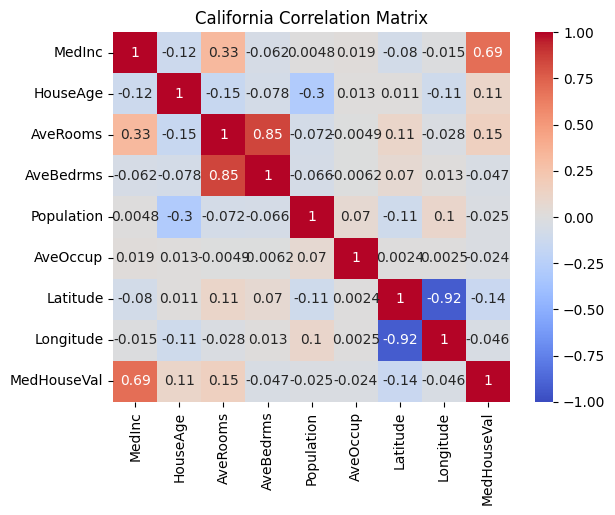

In [16]:
# 查看协方差矩阵
california_df = X.join(y)
corr_matrix = california_df.corr()

sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True, vmax = 1, vmin = -1)

plt.title('California Correlation Matrix')
plt.show()

<AxesSubplot:xlabel='MedInc', ylabel='MedHouseVal'>

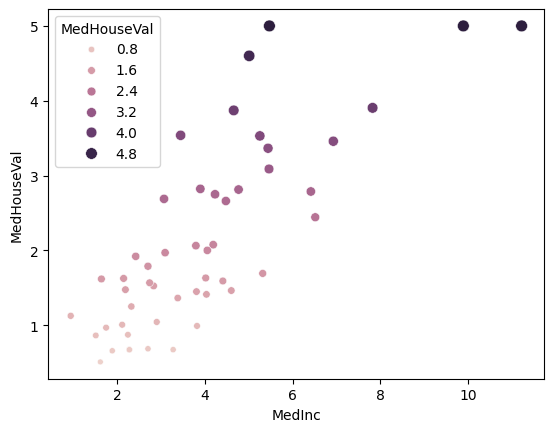

In [17]:
# 删除大部分数据，保留50个，只是为了方便观察
selected_cal_df = california_df.sample(n = 50, random_state = 2)

sns.scatterplot(data = selected_cal_df, x = 'MedInc', y = 'MedHouseVal', hue = 'MedHouseVal',
                size = 'MedHouseVal')

In [18]:
'''
分离训练集和测试集
'''

X = selected_cal_df[['MedInc']]
y = selected_cal_df[['MedHouseVal']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

knn_reg = KNeighborsRegressor(n_neighbors = 1)

knn_reg.fit(X_train, y_train)

knn_reg.score(X_test, y_test)

0.3967999208982136

### ================= 绘图 =================

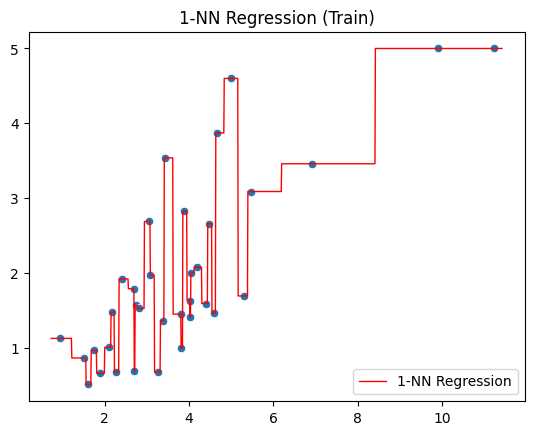

In [19]:
import sys
sys.path.append("../..")

from ToolKit.ML import plot_fitted_curve1F2D

plot_fitted_curve1F2D(X_train, X_test, y_train, y_test, knn_reg, 'train', '1-NN Regression', '1-NN Regression (Train)')

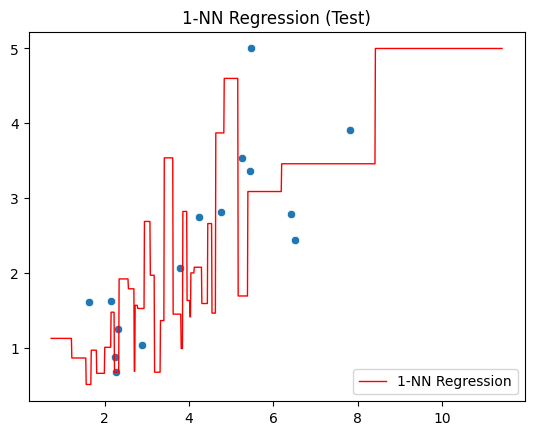

In [20]:
plot_fitted_curve1F2D(X_train, X_test, y_train, y_test, knn_reg, 'test', '1-NN Regression', '1-NN Regression (Test)')

In [21]:
knn_reg = KNeighborsRegressor(n_neighbors = 3)

knn_reg.fit(X_train, y_train)

knn_reg.score(X_test, y_test)

0.6632054654793573

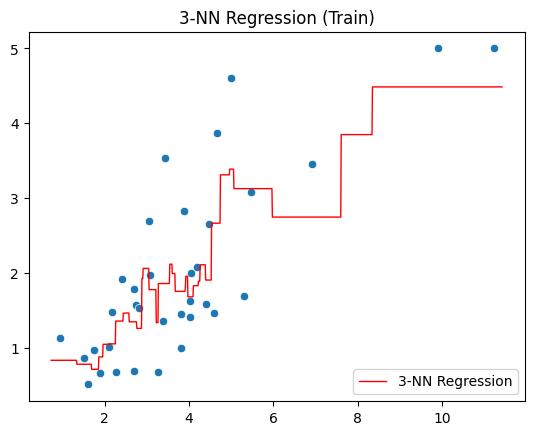

In [22]:
plot_fitted_curve1F2D(X_train, X_test, y_train, y_test, knn_reg, 'train', '3-NN Regression', '3-NN Regression (Train)')

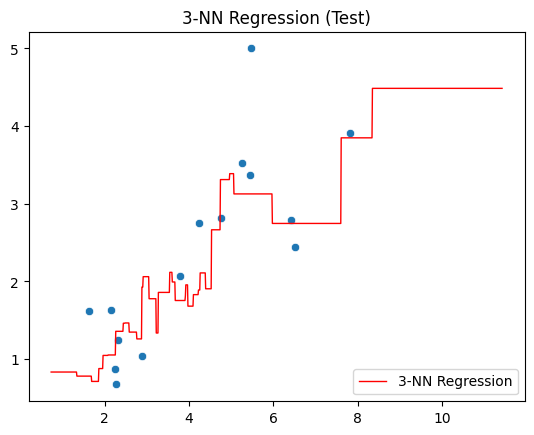

In [23]:
plot_fitted_curve1F2D(X_train, X_test, y_train, y_test, knn_reg, 'test', '3-NN Regression', '3-NN Regression (Test)')

In [24]:
knn_reg = KNeighborsRegressor(n_neighbors = 5)

knn_reg.fit(X_train, y_train)

knn_reg.score(X_test, y_test)

0.5908135760130663

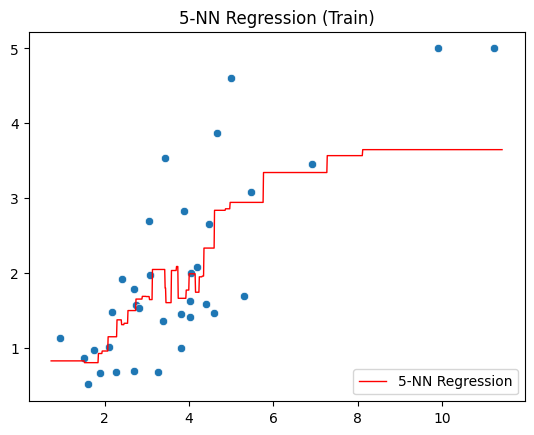

In [25]:
plot_fitted_curve1F2D(X_train, X_test, y_train, y_test, knn_reg, 'train', '5-NN Regression', '5-NN Regression (Train)')

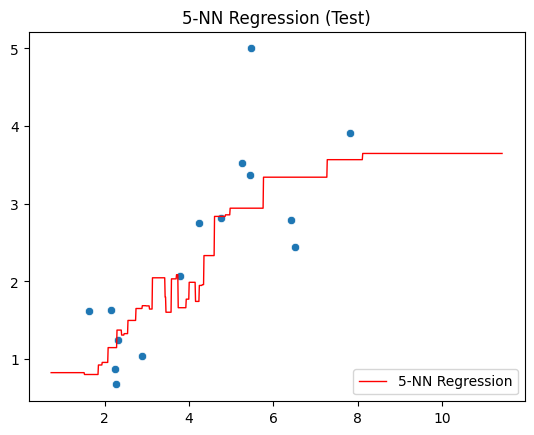

In [26]:
plot_fitted_curve1F2D(X_train, X_test, y_train, y_test, knn_reg, 'test', '5-NN Regression', '5-NN Regression (Test)')